In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set_theme()
sns.set_style("whitegrid")

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

from sklearn.preprocessing import StandardScaler

In [2]:
# Read in the data
mldata = pd.read_csv("mldata.csv")

mldata.head()

,Unnamed: 0,campaign_number,user_engagement,banner,placement,displays,clicks,ad_spend_by_company_x,post_click_conversions,post_click_sales_amount
0,0,camp 1,High,160 x 600,abc,4,0,0.0000,0,0.0000
1,1,camp 1,High,160 x 600,def,20170,158,28.9717,23,1972.4602
2,2,camp 1,High,160 x 600,ghi,14701,158,28.9771,78,2497.2636
3,3,camp 1,High,160 x 600,mno,171259,1796,329.4518,617,24625.3234
4,4,camp 1,Low,160 x 600,def,552,1,0.1834,0,0.0000


In [3]:
# Preprocessing LinReg with "post_click_sales_amount" as target

# all Campaigns
mldata_camp_total = mldata

# Only Camp 1
mldata_camp_1 = mldata[mldata["campaign_number"] == "camp 1"]

# Only Camp 2
mldata_camp_2 = mldata[mldata["campaign_number"] == "camp 2"]

# Only Camp 3
mldata_camp_3 = mldata[mldata["campaign_number"] == "camp 3"]


# Selection of selected features relevant for ML - without "campaign_number" as feature - with "post_click_sales_amount" as label:

# all Campaigns
mldata_camp_total = mldata_camp_total[["banner", "placement", "ad_spend_by_company_x", "post_click_sales_amount"]].reset_index(drop=True)

# Only Camp 1
mldata_camp_1 = mldata_camp_1[["banner", "placement", "ad_spend_by_company_x", "post_click_sales_amount"]].reset_index(drop=True)

# Only Camp 2
mldata_camp_2 = mldata_camp_2[["banner", "placement", "ad_spend_by_company_x", "post_click_sales_amount"]].reset_index(drop=True)

# Only Camp 3
mldata_camp_3 = mldata_camp_3[["banner", "placement", "ad_spend_by_company_x", "post_click_sales_amount"]].reset_index(drop=True)

mldata_camp_3.head()

,banner,placement,ad_spend_by_company_x,post_click_sales_amount
0,160 x 600,def,0.2096,0.0000
1,160 x 600,ghi,0.0000,0.0000
2,160 x 600,mno,2.6210,532.0745
3,160 x 600,abc,0.0000,0.0000
4,160 x 600,def,1.1008,0.0000


Koeffizienten:  [[  95.7834776   530.41240915  800.84199083  -75.10728254  359.23644527
    33.32438247  864.73056572 -560.01644412  283.16039087  838.23533953
   208.7391091  1195.88389765]]
Konstante, wenn alle Variablen 0 sind: [-624.62663936]


The model performance for test set
--------------------------------------
MAE: 1578.4151628269215
MSE: 24534165.97071568
RMSE: 4953.19755014028
R2 score is 0.7723494228044554


Regressionsergebnisse für Trainingsdatensatz:
                               OLS Regression Results                              
Dep. Variable:     post_click_sales_amount   R-squared:                       0.797
Model:                                 OLS   Adj. R-squared:                  0.797
Method:                      Least Squares   F-statistic:                     3281.
Date:                     Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                             13:54:22   Log-Likelihood:                -99544.
No. Observations:       

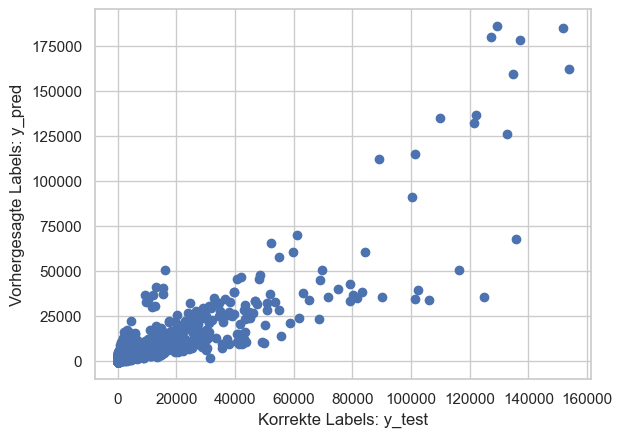

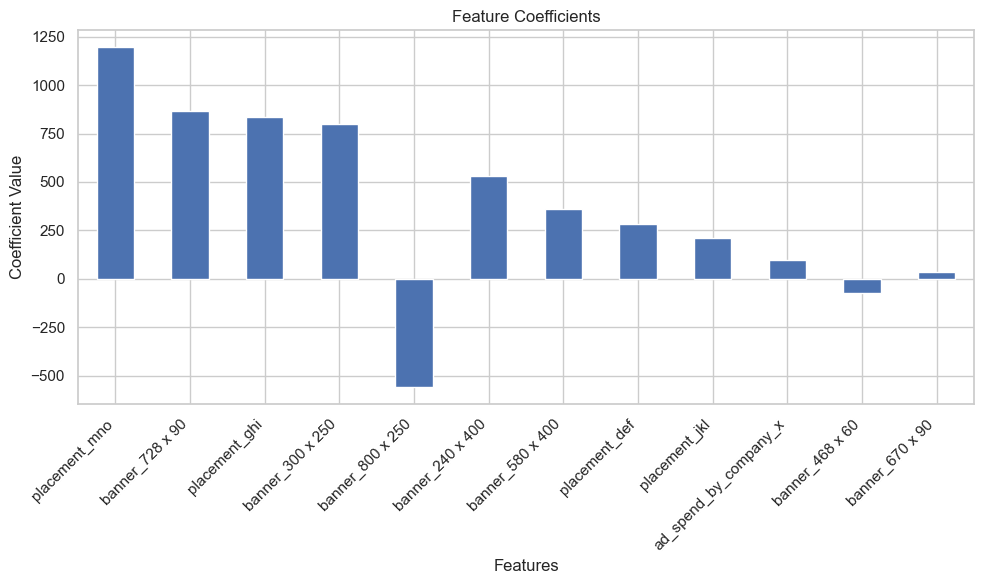

,Coefficient,Abs_Coefficient,Importance
placement_mno,1195.883898,1195.883898,20.458296
banner_728 x 90,864.730566,864.730566,14.793170
placement_ghi,838.235340,838.235340,14.339909
banner_300 x 250,800.841991,800.841991,13.700211
banner_800 x 250,-560.016444,560.016444,9.580346
banner_240 x 400,530.412409,530.412409,9.073903
banner_580 x 400,359.236445,359.236445,6.145551
placement_def,283.160391,283.160391,4.844098
placement_jkl,208.739109,208.739109,3.570954
ad_spend_by_company_x,95.783478,95.783478,1.638593


In [20]:
### Linear Regression - All Campaigns  ###

# Define the features(X) and the label(y)
X = mldata_camp_total[["banner", "placement", "ad_spend_by_company_x"]]
y = mldata_camp_total[["post_click_sales_amount"]]

# Create the dummies for the categorical variables
X = pd.get_dummies(data=X, columns=["banner"], prefix="banner", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["placement"], prefix="placement", dtype=float, drop_first=True)

# Create the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Initialise the model for linear regression
lr = LinearRegression()

# Train model:
lr.fit(X_train, y_train)

# Coefficients:
print('Coefficients: ', lr.coef_)
print("Constant if all variables are 0:", lr.intercept_)

# Make predictions
y_pred = lr.predict(X_test)

# Visualisation of the correct vs. predicted labels
plt.scatter(y_test, y_pred)
plt.xlabel('Correct labels: y_test')
plt.ylabel('Predicted labels: y_pred')
print("\n")

# Modell Performance für Testdatensatz:
r2 = r2_score(y_test, y_pred) # Berechnung des R² Bestimmtheitsmaß'

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Berechnung des RMSE Fehlermaß'
print('R2 score is {}'.format(r2))
print("\n")

# OLS Regression Results: fit model
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
# Output results
print("Regression results for training data set:")
print(results.summary())
print("\n")
print(results.params)

koef = pd.DataFrame(lr.coef_.reshape(1, -1), columns=X.columns)

koef = koef.T

koef.columns = ['Coefficient']

koef['Abs_Coefficient'] = abs(koef['Coefficient'])
koef_sorted = koef.sort_values('Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
koef_sorted['Coefficient'].plot(kind='bar')
plt.title('Feature Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


koef['Importance'] = abs(koef['Coefficient']) / sum(abs(koef['Coefficient'])) * 100
koef_sorted = koef.sort_values('Importance', ascending=False)

koef_sorted

Koeffizienten:  [[   92.1638153   1328.45395193  1403.5793207  -1029.57877021
    152.89903854  -756.96420273  1587.50777145 -2544.52175054
    853.25117642  2593.8033333    696.42744058  3673.43726347]]
Konstante, wenn alle Variablen 0 sind: [-1058.58891702]


The model performance for test set
--------------------------------------
MAE: 3009.9681104499264
MSE: 47291139.99481961
RMSE: 6876.855385626457
R2 score is 0.7967324368092988


Regression results for training data set:
                               OLS Regression Results                              
Dep. Variable:     post_click_sales_amount   R-squared:                       0.816
Model:                                 OLS   Adj. R-squared:                  0.815
Method:                      Least Squares   F-statistic:                     1657.
Date:                     Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                             15:15:19   Log-Likelihood:                -46030.
No. Observatio

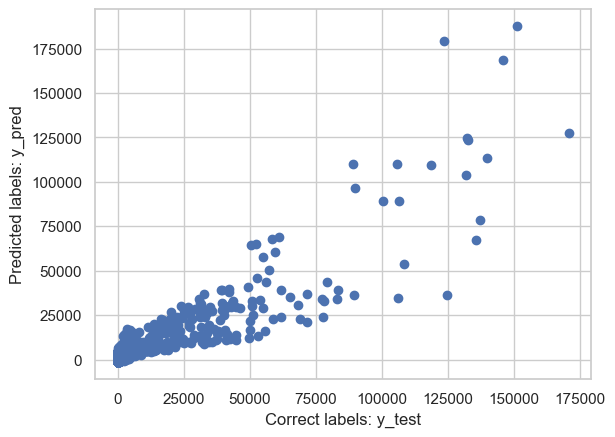

In [5]:
### Linear Regression - Campaign 1  ###

# Define the features(X) and the label(y)
X = mldata_camp_1[["banner", "placement", "ad_spend_by_company_x"]]
y = mldata_camp_1[["post_click_sales_amount"]]

# Create the dummies for the categorical variables
X = pd.get_dummies(data=X, columns=["banner"], prefix="banner", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["placement"], prefix="placement", dtype=float, drop_first=True)

# Create the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Initialise the model for linear regression
lr = LinearRegression()

# Train model:
lr.fit(X_train, y_train)

# Coefficients:
print('Coefficients: ', lr.coef_)
print("Constant if all variables are 0:", lr.intercept_)

# Make predictions
y_pred = lr.predict(X_test)

# Visualisation of the correct vs. predicted labels
plt.scatter(y_test, y_pred)
plt.xlabel('Correct labels: y_test')
plt.ylabel('Predicted labels: y_pred')
print("\n")

# Modell Performance für Testdatensatz:
r2 = r2_score(y_test, y_pred) # Berechnung des R² Bestimmtheitsmaß'

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Berechnung des RMSE Fehlermaß'
print('R2 score is {}'.format(r2))
print("\n")

# OLS Regression Results: fit model
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
# Output results
print("Regression results for training data set:")
print(results.summary())
print("\n")
print(results.params)

Koeffizienten:  [[ 2.38879566e-02  5.15926129e+02 -2.02095409e+02  4.87858061e+02
   1.20018911e+03  2.02955328e+02 -2.50155177e+02  1.00449795e+03
  -4.71523186e+02  3.57286088e+02 -2.19595415e+02 -1.16241982e+03]]
Konstante, wenn alle Variablen 0 sind: [158.94465819]


The model performance for test set
--------------------------------------
MAE: 565.2015261739398
MSE: 872284.3965885852
RMSE: 933.9616676227056
R2 score is 0.6781024762063446


Regressionsergebnisse für Trainingsdatensatz:
                            OLS Regression Results                            
Dep. Variable:                 clicks   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     183.1
Date:                Fri, 20 Sep 2024   Prob (F-statistic):          3.51e-224
Time:                        12:03:32   Log-Likelihood:                -6908.3
No. Observations:              

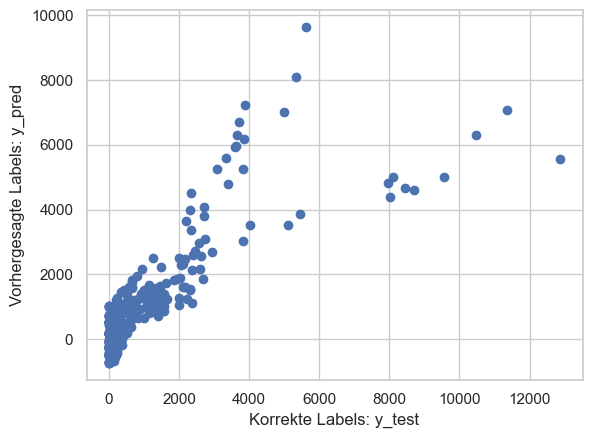

In [35]:
### Linear Regression - Campaign 2 ###

# Define the features(X) and the label(y)
X = mldata_camp_2[["banner", "placement", "ad_spend_by_company_x"]]
y = mldata_camp_2[["post_click_sales_amount"]]

# Create the dummies for the categorical variables
X = pd.get_dummies(data=X, columns=["banner"], prefix="banner", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["placement"], prefix="placement", dtype=float, drop_first=True)

# Create the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Initialise the model for linear regression
lr = LinearRegression()

# Train model:
lr.fit(X_train, y_train)

# Coefficients:
print('Coefficients: ', lr.coef_)
print("Constant if all variables are 0:", lr.intercept_)

# Make predictions
y_pred = lr.predict(X_test)

# Visualisation of the correct vs. predicted labels
plt.scatter(y_test, y_pred)
plt.xlabel('Correct labels: y_test')
plt.ylabel('Predicted labels: y_pred')
print("\n")

# Modell Performance für Testdatensatz:
r2 = r2_score(y_test, y_pred) # Berechnung des R² Bestimmtheitsmaß'

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Berechnung des RMSE Fehlermaß'
print('R2 score is {}'.format(r2))
print("\n")

# OLS Regression Results: fit model
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
# Output results
print("Regression results for training data set:")
print(results.summary())
print("\n")
print(results.params)

Koeffizienten:  [[ 3.79767187e-03  6.42859026e-01 -4.90773565e+00  3.25347473e+00
   6.15200221e+01 -1.66803453e+00 -1.78579590e+01  1.53576427e+01
  -9.59649388e+00  1.55147528e+01 -4.22699353e+00 -2.93914823e+01]]
Konstante, wenn alle Variablen 0 sind: [14.99206525]


The model performance for test set
--------------------------------------
MAE: 20.10196602840053
MSE: 1159.435429714086
RMSE: 34.050483545965776
R2 score is 0.7902851379977709


Regressionsergebnisse für Trainingsdatensatz:
                            OLS Regression Results                            
Dep. Variable:                 clicks   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     974.2
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:04:38   Log-Likelihood:                -14634.
No. Observations:              

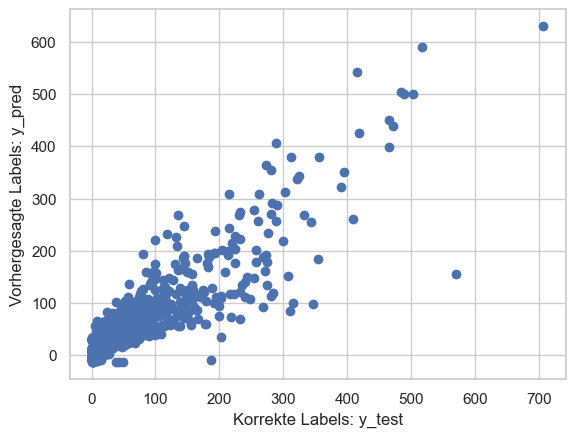

In [37]:
### Linear Regression - Campaign 3  ###

# Define the features(X) and the label(y)
X = mldata_camp_3[["banner", "placement", "ad_spend_by_company_x"]]
y = mldata_camp_3[["post_click_sales_amount"]]

# Create the dummies for the categorical variables
X = pd.get_dummies(data=X, columns=["banner"], prefix="banner", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["placement"], prefix="placement", dtype=float, drop_first=True)

# Create the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Initialise the model for linear regression
lr = LinearRegression()

# Train model:
lr.fit(X_train, y_train)

# Coefficients:
print('Coefficients:', lr.coef_)
print("Constant if all variables are 0:", lr.intercept_)

# Make predictions
y_pred = lr.predict(X_test)

# Visualisation of the correct vs. predicted labels
plt.scatter(y_test, y_pred)
plt.xlabel('Correct labels: y_test')
plt.ylabel('Predicted labels: y_pred')
print("\n")

# Modell Performance für Testdatensatz:
r2 = r2_score(y_test, y_pred) # Berechnung des R² Bestimmtheitsmaß'

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Berechnung des RMSE Fehlermaß'
print('R2 score is {}'.format(r2))
print("\n")

# OLS Regression Results: fit model
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
# Output results
print("Regression results for training data set:")
print(results.summary())
print("\n")
print(results.params)